C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: '_tkinter.tkapp' object has no attribute 'show_frame'

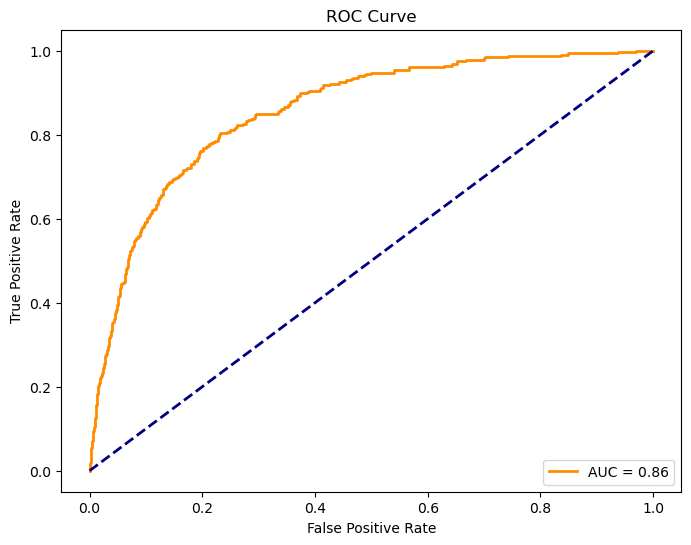

In [41]:
from tkinter import ttk, filedialog
import tkinter as tk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class StartPage(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#2C3E50')
        label = ttk.Label(self, text="Welcome to Transaction Insight Analytics!", font=('Century Gothic Bold', 36), foreground='#ECF0F1', background='#2C3E50')
        label.pack(pady=10, padx=10)

        # Add a label for CSV file support
        csv_label = ttk.Label(self, text="Note: Only CSV files are supported.", style='FWBB2.TLabel')
        csv_label.pack(pady=10)

        # Add a label to display the loaded dataset
        controller.loaded_dataset_label = ttk.Label(self, text="", style='FWBB2.TLabel')
        controller.loaded_dataset_label.pack(pady=10)

        # Add a label for selecting the algorithm with a cool style
        algorithm_label = ttk.Label(self, text="Select Algorithm:", style='FWBB2.TLabel')
        algorithm_label.pack(pady=10)

        # Add buttons for algorithms with a cool style
        algorithms = ["Logistic Regression", "Decision Tree", "Random Forest"]
        for i, algorithm in enumerate(algorithms):
            algorithm_button = ttk.Button(self, text=algorithm, style='FB.TButton', command=lambda algo=algorithm: controller.submit_algorithm(algo))
            algorithm_button.pack(pady=10)

class LogisticRegressionAlgorithmPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        label = ttk.Label(self, text="Logistic Regression Algorithm", font=('Century Gothic Bold', 16))
        label.pack(pady=10, padx=10)

        # Buttons to display results
        roc_curve_button = ttk.Button(self, text="ROC Curve", command=self.display_roc_curve, style='FB.TButton')
        roc_curve_button.pack(pady=5)

        confusion_matrix_button = ttk.Button(self, text="Confusion Matrix", command=self.display_confusion_matrix, style='FB.TButton')
        confusion_matrix_button.pack(pady=5)

        metrics_button = ttk.Button(self, text="Classification Metrics", command=self.display_classification_metrics, style='FB.TButton')
        metrics_button.pack(pady=5)

        # Create a Matplotlib figure and canvas
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, self)
        self.canvas.get_tk_widget().pack()

        # Load the dataset and train the logistic regression model
        self.load_and_train_logistic_regression()

    def load_and_train_logistic_regression(self):
        # Load the dataset
        url = "https://raw.githubusercontent.com/MuzammilAhmed14/CodSoft/main/Credit%20Card%20dataset.csv"
        df = pd.read_csv(url)

        # Drop unnecessary columns
        drop_columns = ["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
        df = df.drop(drop_columns, axis=1)

        # Handle missing values if any
        df = df.dropna()

        # Convert categorical variables to numerical using one-hot encoding
        df = pd.get_dummies(df, columns=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)

        # Define features (X) and target variable (y)
        X = df.drop("Attrition_Flag", axis=1)
        y = df["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the logistic regression model
        self.model = LogisticRegression()
        self.model.fit(self.X_train, self.y_train)

        # Display ROC curve by default
        self.display_roc_curve()

    def display_roc_curve(self):
        y_prob = self.model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(self.y_test, y_prob)
        roc_auc = roc_auc_score(self.y_test, y_prob)

        self.ax.clear()
        self.ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        self.ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        self.ax.set_xlabel('False Positive Rate')
        self.ax.set_ylabel('True Positive Rate')
        self.ax.set_title('ROC Curve')
        self.ax.legend(loc="lower right")

        self.canvas.draw()

    def display_confusion_matrix(self):
        Y_predicted = self.model.predict(self.X_test)
        conf_matrix = confusion_matrix(self.y_test, Y_predicted)

        self.ax.clear()
        class_labels = sorted(self.y_test.unique())  # Use unique values in y_test
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        self.ax.set_title('Confusion Matrix')
        self.ax.set_xlabel('Predicted')
        self.ax.set_ylabel('Actual')

        self.canvas.draw()

    def display_classification_metrics(self):
        # Get predictions on the test set
        y_pred = self.model.predict(self.X_test)

        # Classification Report
        class_labels = ['Existing Customer', 'Attrited Customer']
        class_report = classification_report(self.y_test, y_pred, target_names=class_labels, output_dict=True)

        # Extract precision, recall, and f1-score values
        precision_values = [class_report[label]['precision'] for label in class_labels]
        recall_values = [class_report[label]['recall'] for label in class_labels]
        f1_values = [class_report[label]['f1-score'] for label in class_labels]

        # Create a bar graph for Precision, Recall, and F1-score
        metrics = ['Precision', 'Recall', 'F1-score']
        values = [precision_values, recall_values, f1_values]

        # Clear existing plot
        self.ax.clear()

        for i, metric in enumerate(metrics):
            self.ax.bar(class_labels, values[i], label=metric)

        self.ax.set_ylim(0, 1)
        self.ax.set_title('Precision, Recall, and F1-score for each class')
        self.ax.set_ylabel('Score')
        self.ax.legend()

        self.canvas.draw()

class MachineLearningAlgorithm(tk.Tk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        style = ttk.Style(self)

        style.configure('BB.TFrame', background='#3b3b3b')
        style.configure('FB.TButton', foreground='#3b3b3b', font=('Century Gothic Bold', 14))

        self.title("Transaction Insight Analytics")
        self.state('zoomed')

        container = tk.Frame(self)
        container.grid(row=0, column=0, sticky='NSEW')
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {'StartPage': StartPage(parent=container, controller=self),
                       'LogisticRegressionAlgorithmPage': LogisticRegressionAlgorithmPage(parent=container, controller=self)}
        
        for frame_name, frame in self.frames.items():
            frame.grid(row=0, column=0, sticky='NSEW')

        self.show_frame("StartPage")

        self.rowconfigure(0, weight=1)
        self.columnconfigure(0, weight=1)

# Main application loop
app = MachineLearningAlgorithm()
app.mainloop()


C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Algorithm: Logistic Regression
Loaded Dataset: C:/Users/Personal/Desktop/Final Semster/Machine Learning/Project/Credit Card dataset.csv


C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


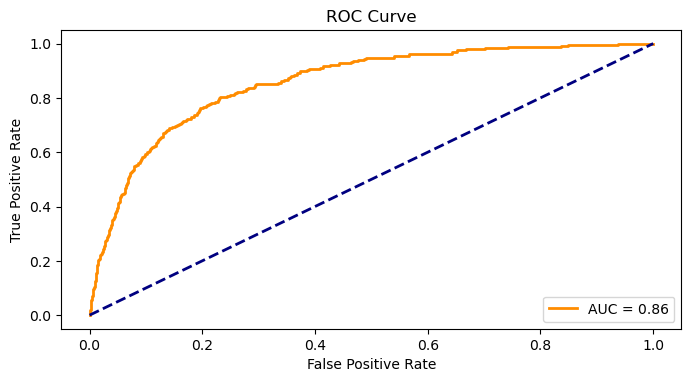

In [47]:
from tkinter import ttk, filedialog
import tkinter as tk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class StartPage(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#2C3E50')
        label = ttk.Label(self, text="Welcome to Transaction Insight Analytics!", font=('Century Gothic Bold', 36), foreground='#ECF0F1', background='#2C3E50')
        label.pack(pady=10, padx=10)

        # Add a label for CSV file support
        csv_label = ttk.Label(self, text="Note: Only CSV files are supported.", style='FWBB2.TLabel')
        csv_label.pack(pady=10)

        # Add a button to load the dataset with a cool style
        load_dataset_button = ttk.Button(self, text="Load Dataset (CSV)", style='FB.TButton', command=lambda: controller.load_dataset())
        load_dataset_button.pack(pady=10)

        # Add a label to display the loaded dataset
        controller.loaded_dataset_label = ttk.Label(self, text="", style='FWBB2.TLabel')
        controller.loaded_dataset_label.pack(pady=10)

        # Add a label for selecting the algorithm with a cool style
        algorithm_label = ttk.Label(self, text="Select Algorithm:", style='FWBB2.TLabel')
        algorithm_label.pack(pady=10)

        # Add buttons for algorithms with a cool style
        algorithms = ["Logistic Regression", "Decision Tree", "Random Forest"]
        for i, algorithm in enumerate(algorithms):
            algorithm_button = ttk.Button(self, text=algorithm, style='FB.TButton', command=lambda algo=algorithm: controller.submit_algorithm(algo))
            algorithm_button.pack(pady=10)

class LogisticRegressionAlgorithmPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        label = ttk.Label(self, text="Logistic Regression Algorithm", font=('Century Gothic Bold', 16))
        label.pack(pady=10, padx=10)

        # Buttons to display results
        roc_curve_button = ttk.Button(self, text="ROC Curve", command=self.display_roc_curve, style='FB.TButton')
        roc_curve_button.pack(pady=5)

        confusion_matrix_button = ttk.Button(self, text="Confusion Matrix", command=self.display_confusion_matrix, style='FB.TButton')
        confusion_matrix_button.pack(pady=5)

        metrics_button = ttk.Button(self, text="Classification Metrics", command=self.display_classification_metrics, style='FB.TButton')
        metrics_button.pack(pady=5)

        # Create a Matplotlib figure and canvas
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, self)
        self.canvas.get_tk_widget().pack()

        # Load the dataset and train the logistic regression model
        self.load_and_train_logistic_regression()

    def load_and_train_logistic_regression(self):
        # Load the dataset
        url = "https://raw.githubusercontent.com/MuzammilAhmed14/CodSoft/main/Credit%20Card%20dataset.csv"
        df = pd.read_csv(url)

        # Drop unnecessary columns
        drop_columns = ["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
        df = df.drop(drop_columns, axis=1)

        # Handle missing values if any
        df = df.dropna()

        # Convert categorical variables to numerical using one-hot encoding
        df = pd.get_dummies(df, columns=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)

        # Define features (X) and target variable (y)
        X = df.drop("Attrition_Flag", axis=1)
        y = df["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the logistic regression model
        self.model = LogisticRegression()
        self.model.fit(self.X_train, self.y_train)

    def display_roc_curve(self):
        y_prob = self.model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(self.y_test, y_prob)
        roc_auc = roc_auc_score(self.y_test, y_prob)

        self.ax.clear()
        self.ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        self.ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        self.ax.set_xlabel('False Positive Rate')
        self.ax.set_ylabel('True Positive Rate')
        self.ax.set_title('ROC Curve')
        self.ax.legend(loc="lower right")

        self.canvas.draw()

    def display_confusion_matrix(self):
        Y_predicted = self.model.predict(self.X_test)
        conf_matrix = confusion_matrix(self.y_test, Y_predicted)

        self.ax.clear()
        class_labels = sorted(self.y_test.unique())  # Use unique values in y_test
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        self.ax.set_title('Confusion Matrix')
        self.ax.set_xlabel('Predicted')
        self.ax.set_ylabel('Actual')

        self.canvas.draw()

    def display_classification_metrics(self):
        # Get predictions on the test set
        y_pred = self.model.predict(self.X_test)

        # Classification Report
        class_labels = ['Existing Customer', 'Attrited Customer']
        class_report = classification_report(self.y_test, y_pred, target_names=class_labels, output_dict=True)

        # Extract precision, recall, and f1-score values
        precision_values = [class_report[label]['precision'] for label in class_labels]
        recall_values = [class_report[label]['recall'] for label in class_labels]
        f1_values = [class_report[label]['f1-score'] for label in class_labels]

        # Create a bar graph for Precision, Recall, and F1-score
        metrics = ['Precision', 'Recall', 'F1-score']
        values = [precision_values, recall_values, f1_values]

        # Clear existing plot
        self.ax.clear()

        for i, metric in enumerate(metrics):
            self.ax.bar(class_labels, values[i], label=metric)

        self.ax.set_ylim(0, 1)
        self.ax.set_title('Precision, Recall, and F1-score for each class')
        self.ax.set_ylabel('Score')
        self.ax.legend()

        self.canvas.draw()

class MachineLearningAlgorithm(tk.Tk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        style = ttk.Style(self)

        style.configure('BB.TFrame', background='#3b3b3b')
        style.configure('FB.TButton', foreground='#3b3b3b', font=('Century Gothic Bold', 14))

        self.title("Transaction Insight Analytics")
        self.state('zoomed')

        container = tk.Frame(self)
        container.grid(row=0, column=0, sticky='NSEW')
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {'StartPage': StartPage(parent=container, controller=self),
                       'LogisticRegressionAlgorithmPage': LogisticRegressionAlgorithmPage(parent=container, controller=self)}
        
        for frame_name, frame in self.frames.items():
            frame.grid(row=0, column=0, sticky='NSEW')

        self.show_frame("StartPage")

        self.rowconfigure(0, weight=1)
        self.columnconfigure(0, weight=1)

        # Add a label for CSV file support
        csv_label = ttk.Label(self, text="Note: Only CSV files are supported.", style='FWBB2.TLabel')
        csv_label.grid(row=1, column=0, padx=10, pady=10)

        # Add a button to load the dataset with a cool style
        load_dataset_button = ttk.Button(self, text="Load Dataset (CSV)", style='FB.TButton', command=self.load_dataset)
        load_dataset_button.grid(row=2, column=0, padx=10, pady=10)

        # Add a label to display the loaded dataset
        self.loaded_dataset_label = ttk.Label(self, text="", style='FWBB2.TLabel')
        self.loaded_dataset_label.grid(row=3, column=0, padx=10, pady=10)

    def show_frame(self, page_name):
        frame = self.frames[page_name]
        frame.tkraise()

    def load_dataset(self):
        # Use filedialog to get the path of the dataset file
        file_path = filedialog.askopenfilename(title="Select Dataset", filetypes=[("CSV files", "*.csv")])

        # Display the loaded dataset path on the label
        self.loaded_dataset_label.config(text=f"Loaded Dataset: {file_path}")

        # Store the loaded dataset path for later use
        self.loaded_dataset_path = file_path

    def submit_algorithm(self, selected_algorithm):
        if selected_algorithm and hasattr(self, 'loaded_dataset_path'):
            # Do something with the selected algorithm and the loaded dataset
            print(f"Selected Algorithm: {selected_algorithm}")
            print(f"Loaded Dataset: {self.loaded_dataset_path}")

            # Check if the selected algorithm is "Logistic Regression"
            if selected_algorithm == "Logistic Regression":
                self.show_frame("LogisticRegressionAlgorithmPage")  # Switch to the Logistic Regression Algorithm page
                self.frames["LogisticRegressionAlgorithmPage"].load_and_train_logistic_regression()  # Load and train the logistic regression model
                self.frames["LogisticRegressionAlgorithmPage"].display_roc_curve()  # Display ROC curve
            else:
                # Handle other algorithms as needed
                pass

# Main application loop
app = MachineLearningAlgorithm()
app.mainloop()


C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Algorithm: Logistic Regression
Loaded Dataset: C:/Users/Personal/Desktop/Final Semster/Machine Learning/Project/Credit Card dataset.csv


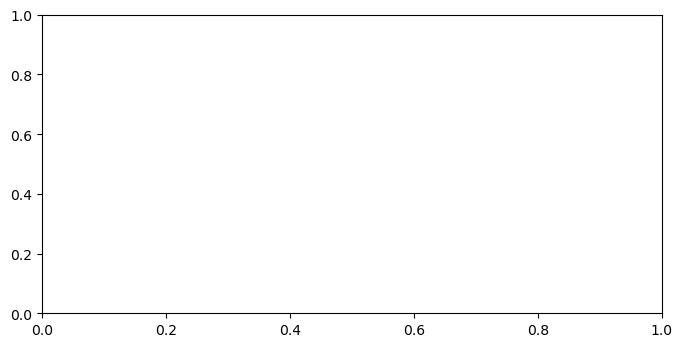

In [51]:
from tkinter import ttk, filedialog
import tkinter as tk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class StartPage(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#2C3E50')
        label = ttk.Label(self, text="Welcome to Transaction Insight Analytics!", font=('Century Gothic Bold', 36), foreground='#ECF0F1', background='#2C3E50')
        label.pack(pady=10, padx=10)

        # Add a label for CSV file support
        csv_label = ttk.Label(self, text="Note: Only CSV files are supported.", style='FWBB2.TLabel')
        csv_label.pack(pady=10)

        # Add a button to load the dataset with a cool style
        load_dataset_button = ttk.Button(self, text="Load Dataset (CSV)", style='FB.TButton', command=lambda: controller.load_dataset())
        load_dataset_button.pack(pady=10)

        # Add a label to display the loaded dataset
        controller.loaded_dataset_label = ttk.Label(self, text="", style='FWBB2.TLabel')
        controller.loaded_dataset_label.pack(pady=10)

        # Add a label for selecting the algorithm with a cool style
        algorithm_label = ttk.Label(self, text="Select Algorithm:", style='FWBB2.TLabel')
        algorithm_label.pack(pady=10)

        # Add buttons for algorithms with a cool style
        algorithms = ["Logistic Regression", "Decision Tree", "Random Forest"]
        for i, algorithm in enumerate(algorithms):
            algorithm_button = ttk.Button(self, text=algorithm, style='FB.TButton', command=lambda algo=algorithm: controller.submit_algorithm(algo))
            algorithm_button.pack(pady=10)

class LogisticRegressionAlgorithmPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        label = ttk.Label(self, text="Logistic Regression Algorithm", font=('Century Gothic Bold', 16))
        label.pack(pady=10, padx=10)

        # Buttons to display results
        roc_curve_button = ttk.Button(self, text="ROC Curve", command=self.display_roc_curve, style='FB.TButton')
        roc_curve_button.pack(pady=5)

        confusion_matrix_button = ttk.Button(self, text="Confusion Matrix", command=self.display_confusion_matrix, style='FB.TButton')
        confusion_matrix_button.pack(pady=5)

        metrics_button = ttk.Button(self, text="Classification Metrics", command=self.display_classification_metrics, style='FB.TButton')
        metrics_button.pack(pady=5)

        # Create a Matplotlib figure and canvas
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, self)
        self.canvas.get_tk_widget().pack()

    def display_roc_curve(self):
        if not hasattr(self, 'X_test'):
            print("Please upload the dataset first.")
            return

        y_prob = self.model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(self.y_test, y_prob)
        roc_auc = roc_auc_score(self.y_test, y_prob)

        self.ax.clear()
        self.ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        self.ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        self.ax.set_xlabel('False Positive Rate')
        self.ax.set_ylabel('True Positive Rate')
        self.ax.set_title('ROC Curve')
        self.ax.legend(loc="lower right")

        self.canvas.draw()

    def display_confusion_matrix(self):
        if not hasattr(self, 'X_test'):
            print("Please upload the dataset first.")
            return

        Y_predicted = self.model.predict(self.X_test)
        conf_matrix = confusion_matrix(self.y_test, Y_predicted)

        self.ax.clear()
        class_labels = sorted(self.y_test.unique())  # Use unique values in y_test
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        self.ax.set_title('Confusion Matrix')
        self.ax.set_xlabel('Predicted')
        self.ax.set_ylabel('Actual')

        self.canvas.draw()

    def display_classification_metrics(self):
        if not hasattr(self, 'X_test'):
            print("Please upload the dataset first.")
            return

        # Get predictions on the test set
        y_pred = self.model.predict(self.X_test)

        # Classification Report
        class_labels = ['Existing Customer', 'Attrited Customer']
        class_report = classification_report(self.y_test, y_pred, target_names=class_labels, output_dict=True)

        # Extract precision, recall, and f1-score values
        precision_values = [class_report[label]['precision'] for label in class_labels]
        recall_values = [class_report[label]['recall'] for label in class_labels]
        f1_values = [class_report[label]['f1-score'] for label in class_labels]

        # Create a bar graph for Precision, Recall, and F1-score
        metrics = ['Precision', 'Recall', 'F1-score']
        values = [precision_values, recall_values, f1_values]

        # Clear existing plot
        self.ax.clear()

        for i, metric in enumerate(metrics):
            self.ax.bar(class_labels, values[i], label=metric)

        self.ax.set_ylim(0, 1)
        self.ax.set_title('Precision, Recall, and F1-score for each class')
        self.ax.set_ylabel('Score')
        self.ax.legend()

        self.canvas.draw()

    def load_and_train_logistic_regression(self):
        # Load the dataset
        if not hasattr(self.controller, 'loaded_dataset_path'):
            print("Please upload the dataset first.")
            return

        url = self.controller.loaded_dataset_path
        df = pd.read_csv(url)

        # Drop unnecessary columns
        drop_columns = ["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
        df = df.drop(drop_columns, axis=1)

        # Handle missing values if any
        df = df.dropna()

        # Convert categorical variables to numerical using one-hot encoding
        df = pd.get_dummies(df, columns=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)

        # Define features (X) and target variable (y)
        X = df.drop("Attrition_Flag", axis=1)
        y = df["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the logistic regression model
        self.model = LogisticRegression()
        self.model.fit(self.X_train, self.y_train)

class MachineLearningAlgorithm(tk.Tk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        style = ttk.Style(self)

        style.configure('BB.TFrame', background='#3b3b3b')
        style.configure('FB.TButton', foreground='#3b3b3b', font=('Century Gothic Bold', 14))

        self.title("Transaction Insight Analytics")
        self.state('zoomed')

        container = tk.Frame(self)
        container.grid(row=0, column=0, sticky='NSEW')
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {'StartPage': StartPage(parent=container, controller=self),
                       'LogisticRegressionAlgorithmPage': LogisticRegressionAlgorithmPage(parent=container, controller=self)}
        
        for frame_name, frame in self.frames.items():
            frame.grid(row=0, column=0, sticky='NSEW')

        self.show_frame("StartPage")

        self.rowconfigure(0, weight=1)
        self.columnconfigure(0, weight=1)

        # Add a label for CSV file support
        csv_label = ttk.Label(self, text="Note: Only CSV files are supported.", style='FWBB2.TLabel')
        csv_label.grid(row=1, column=0, padx=10, pady=10)

        # Add a button to load the dataset with a cool style
        load_dataset_button = ttk.Button(self, text="Load Dataset (CSV)", style='FB.TButton', command=self.load_dataset)
        load_dataset_button.grid(row=2, column=0, padx=10, pady=10)

        # Add a label to display the loaded dataset
        self.loaded_dataset_label = ttk.Label(self, text="", style='FWBB2.TLabel')
        self.loaded_dataset_label.grid(row=3, column=0, padx=10, pady=10)

    def show_frame(self, page_name):
        frame = self.frames[page_name]
        frame.tkraise()

    def load_dataset(self):
        # Use filedialog to get the path of the dataset file
        file_path = filedialog.askopenfilename(title="Select Dataset", filetypes=[("CSV files", "*.csv")])

        # Display the loaded dataset path on the label
        self.loaded_dataset_label.config(text=f"Loaded Dataset: {file_path}")

        # Store the loaded dataset path for later use
        self.loaded_dataset_path = file_path

        # Check if the current page is Logistic Regression Algorithm Page
        if isinstance(self.frames["LogisticRegressionAlgorithmPage"], LogisticRegressionAlgorithmPage):
            # Load and train logistic regression if on the algorithm page
            self.frames["LogisticRegressionAlgorithmPage"].load_and_train_logistic_regression()

    def submit_algorithm(self, selected_algorithm):
        if selected_algorithm and hasattr(self, 'loaded_dataset_path'):
            # Do something with the selected algorithm and the loaded dataset
            print(f"Selected Algorithm: {selected_algorithm}")
            print(f"Loaded Dataset: {self.loaded_dataset_path}")

            # Check if the selected algorithm is "Logistic Regression"
            if selected_algorithm == "Logistic Regression":
                self.show_frame("LogisticRegressionAlgorithmPage")  # Switch to the Logistic Regression Algorithm page
            else:
                # Handle other algorithms as needed
                pass

# Main application loop
app = MachineLearningAlgorithm()
app.mainloop()


Selected Algorithm: Random Forest
Loaded Dataset: C:/Users/Personal/Desktop/Final Semster/Machine Learning/Project/Credit Card dataset.csv


C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Personal\anaconda3\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

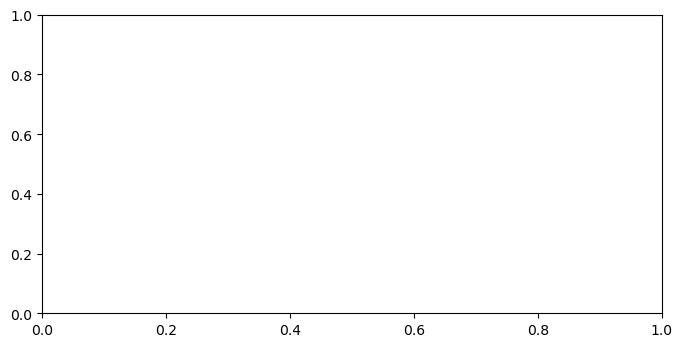

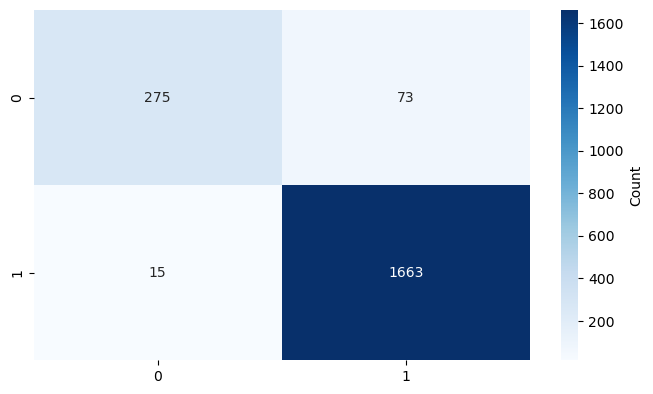

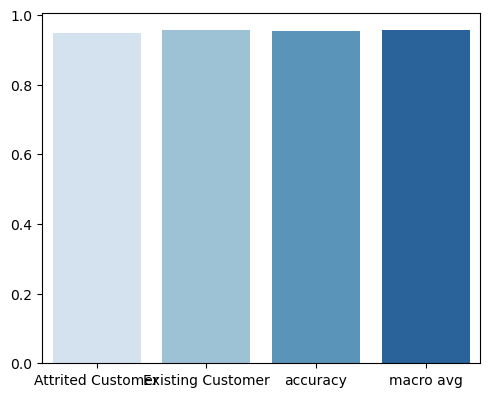

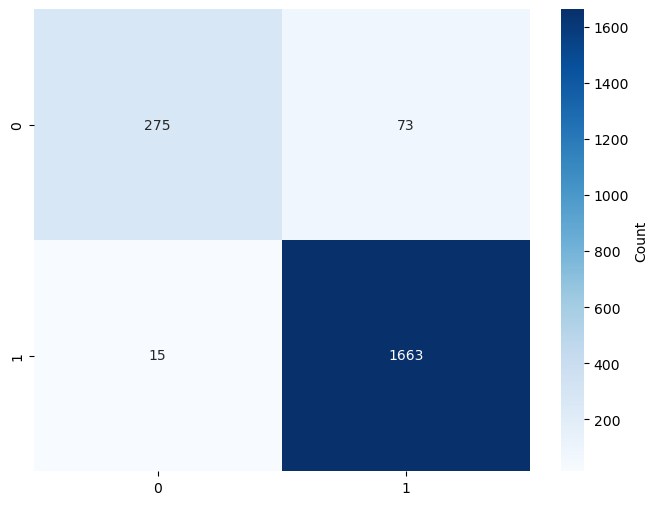

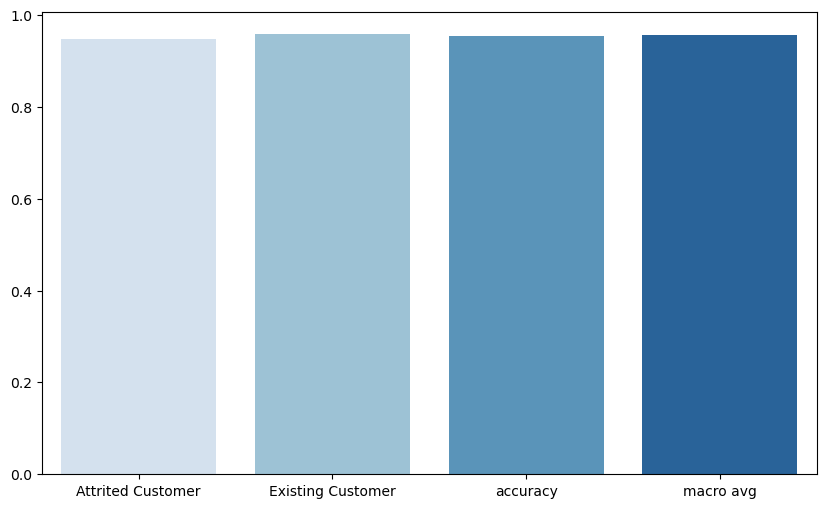

In [55]:
import tkinter as tk
from tkinter import ttk, filedialog
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class StartPage(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#2C3E50')
        label = ttk.Label(self, text="Welcome to Transaction Insight Analytics!", font=('Century Gothic Bold', 36), foreground='#ECF0F1', background='#2C3E50')
        label.pack(pady=10, padx=10)

        # Add a label for CSV file support
        csv_label = ttk.Label(self, text="Note: Only CSV files are supported.", style='FWBB2.TLabel')
        csv_label.pack(pady=10)

        # Add a button to load the dataset with a cool style
        load_dataset_button = ttk.Button(self, text="Load Dataset (CSV)", style='FB.TButton', command=lambda: controller.load_dataset())
        load_dataset_button.pack(pady=10)

        # Add a label to display the loaded dataset
        controller.loaded_dataset_label = ttk.Label(self, text="", style='FWBB2.TLabel')
        controller.loaded_dataset_label.pack(pady=10)

        # Add a label for selecting the algorithm with a cool style
        algorithm_label = ttk.Label(self, text="Select Algorithm:", style='FWBB2.TLabel')
        algorithm_label.pack(pady=10)

        # Add buttons for algorithms with a cool style
        algorithms = ["Logistic Regression", "Random Forest"]
        for i, algorithm in enumerate(algorithms):
            algorithm_button = ttk.Button(self, text=algorithm, style='FB.TButton', command=lambda algo=algorithm: controller.submit_algorithm(algo))
            algorithm_button.pack(pady=10)

class LogisticRegressionAlgorithmPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        label = ttk.Label(self, text="Logistic Regression Algorithm", font=('Century Gothic Bold', 16))
        label.pack(pady=10, padx=10)

        # Buttons to display results
        roc_curve_button = ttk.Button(self, text="ROC Curve", command=self.display_roc_curve, style='FB.TButton')
        roc_curve_button.pack(pady=5)

        confusion_matrix_button = ttk.Button(self, text="Confusion Matrix", command=self.display_confusion_matrix, style='FB.TButton')
        confusion_matrix_button.pack(pady=5)

        metrics_button = ttk.Button(self, text="Classification Metrics", command=self.display_classification_metrics, style='FB.TButton')
        metrics_button.pack(pady=5)

        # Create a Matplotlib figure and canvas
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, self)
        self.canvas.get_tk_widget().pack()

    def load_and_train_logistic_regression(self):
        if not hasattr(self.controller, 'loaded_dataset_path'):
            print("Please upload the dataset first.")
            return

        # Load the dataset
        df = pd.read_csv(self.controller.loaded_dataset_path)

        # Drop unnecessary columns
        drop_columns = ["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
        df = df.drop(drop_columns, axis=1)

        # Handle missing values if any
        df = df.dropna()

        # Convert categorical variables to numerical using one-hot encoding
        df = pd.get_dummies(df, columns=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)

        # Define features (X) and target variable (y)
        X = df.drop("Attrition_Flag", axis=1)
        y = df["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the logistic regression model
        self.model = LogisticRegression()
        self.model.fit(self.X_train, self.y_train)

    def display_roc_curve(self):
        if not hasattr(self, 'X_test'):
            print("Please upload the dataset first.")
            return

        y_prob = self.model.predict_proba(self.X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(self.y_test, y_prob)
        roc_auc = roc_auc_score(self.y_test, y_prob)

        self.ax.clear()
        self.ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        self.ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        self.ax.set_xlabel('False Positive Rate')
        self.ax.set_ylabel('True Positive Rate')
        self.ax.set_title('ROC Curve')
        self.ax.legend(loc="lower right")

        self.canvas.draw()

    def display_confusion_matrix(self):
        if not hasattr(self, 'X_test'):
            print("Please upload the dataset first.")
            return

        Y_predicted = self.model.predict(self.X_test)
        conf_matrix = confusion_matrix(self.y_test, Y_predicted)

        self.ax.clear()
        class_labels = sorted(self.y_test.unique())  # Use unique values in y_test
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        self.ax.set_title('Confusion Matrix')
        self.ax.set_xlabel('Predicted')
        self.ax.set_ylabel('Actual')

        self.canvas.draw()

    def display_classification_metrics(self):
        if not hasattr(self, 'X_test'):
            print("Please upload the dataset first.")
            return

        # Get predictions on the test set
        y_pred = self.model.predict(self.X_test)

        # Classification Report
        class_labels = ['Existing Customer', 'Attrited Customer']
        class_report = classification_report(self.y_test, y_pred, target_names=class_labels, output_dict=True)

        # Extract precision, recall, and f1-score values
        precision_values = [class_report[label]['precision'] for label in class_labels]
        recall_values = [class_report[label]['recall'] for label in class_labels]
        f1_values = [class_report[label]['f1-score'] for label in class_labels]

        # Create a bar graph for Precision, Recall, and F1-score
        metrics = ['Precision', 'Recall', 'F1-score']
        values = [precision_values, recall_values, f1_values]

        # Clear existing plot
        self.ax.clear()

        for i, metric in enumerate(metrics):
            self.ax.bar(class_labels, values[i], label=metric)

        self.ax.set_ylim(0, 1)
        self.ax.set_title('Precision, Recall, and F1-score for each class')
        self.ax.set_ylabel('Score')
        self.ax.legend()

        self.canvas.draw()

class RandomForestAlgorithmPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        label = ttk.Label(self, text="Random Forest Algorithm", font=('Century Gothic Bold', 16))
        label.pack(pady=10, padx=10)

        # Buttons to display results
        analyze_button = ttk.Button(self, text="Analyze Data", command=self.analyze_data, style='FB.TButton')
        analyze_button.pack(pady=5)

        # Create a frame to hold Matplotlib figures
        self.figures_frame = ttk.Frame(self)
        self.figures_frame.pack()

    def analyze_data(self):
        if not hasattr(self.controller, 'loaded_dataset_path'):
            print("Please upload the dataset first.")
            return

        # Your existing code for data analysis
        data = pd.read_csv(self.controller.loaded_dataset_path)
        columns_to_drop = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
        data = data.drop(columns=columns_to_drop, axis=1)
        X = data.drop('Attrition_Flag', axis='columns')
        Y = data['Attrition_Flag']
        X = pd.get_dummies(X, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, Y_train)
        Y_predicted = model.predict(X_test)

        # Display results in the same window
        self.display_results(Y_test, Y_predicted)

    def display_results(self, Y_test, Y_predicted):
        # Display accuracy, confusion matrix, and classification report
        accuracy = accuracy_score(Y_test, Y_predicted)
        confusion_matrix_result = confusion_matrix(Y_test, Y_predicted)
        classification_report_result = classification_report(Y_test, Y_predicted, output_dict=True)

        # Display accuracy
        accuracy_label = ttk.Label(self.figures_frame, text=f'Accuracy: {accuracy:.2f}')
        accuracy_label.pack()

        # Display confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'})
        confusion_matrix_canvas = FigureCanvasTkAgg(plt.gcf(), master=self.figures_frame)
        confusion_matrix_canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

        # Display classification report
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(classification_report_result.keys())[:-1],
                    y=[classification_report_result[key]['precision'] for key in
                       classification_report_result.keys() if key != 'accuracy'],
                    palette="Blues")
        classification_report_canvas = FigureCanvasTkAgg(plt.gcf(), master=self.figures_frame)
        classification_report_canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

class MachineLearningAlgorithm(tk.Tk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        style = ttk.Style(self)

        style.configure('BB.TFrame', background='#3b3b3b')
        style.configure('FB.TButton', foreground='#3b3b3b', font=('Century Gothic Bold', 14))

        self.title("Transaction Insight Analytics")
        self.state('zoomed')

        container = tk.Frame(self)
        container.grid(row=0, column=0, sticky='NSEW')
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {'StartPage': StartPage(parent=container, controller=self),
                       'LogisticRegressionAlgorithmPage': LogisticRegressionAlgorithmPage(parent=container, controller=self),
                       'RandomForestAlgorithmPage': RandomForestAlgorithmPage(parent=container, controller=self)}
        
        for frame_name, frame in self.frames.items():
            frame.grid(row=0, column=0, sticky='NSEW')

        self.show_frame("StartPage")

        self.rowconfigure(0, weight=1)
        self.columnconfigure(0, weight=1)

        # Add a label for CSV file support
        csv_label = ttk.Label(self, text="Note: Only CSV files are supported.", style='FWBB2.TLabel')
        csv_label.grid(row=1, column=0, padx=10, pady=10)

        # Add a button to load the dataset with a cool style
        load_dataset_button = ttk.Button(self, text="Load Dataset (CSV)", style='FB.TButton', command=self.load_dataset)
        load_dataset_button.grid(row=2, column=0, padx=10, pady=10)

        # Add a label to display the loaded dataset
        self.loaded_dataset_label = ttk.Label(self, text="", style='FWBB2.TLabel')
        self.loaded_dataset_label.grid(row=3, column=0, padx=10, pady=10)

    def show_frame(self, page_name):
        frame = self.frames[page_name]
        frame.tkraise()

    def load_dataset(self):
        # Use filedialog to get the path of the dataset file
        file_path = filedialog.askopenfilename(title="Select Dataset", filetypes=[("CSV files", "*.csv")])

        # Display the loaded dataset path on the label
        self.loaded_dataset_label.config(text=f"Loaded Dataset: {file_path}")

        # Store the loaded dataset path for later use
        self.loaded_dataset_path = file_path

    def submit_algorithm(self, selected_algorithm):
        if selected_algorithm and hasattr(self, 'loaded_dataset_path'):
            # Do something with the selected algorithm and the loaded dataset
            print(f"Selected Algorithm: {selected_algorithm}")
            print(f"Loaded Dataset: {self.loaded_dataset_path}")

            if selected_algorithm == "Logistic Regression":
                self.show_frame("LogisticRegressionAlgorithmPage")  # Switch to the Logistic Regression Algorithm page
                self.frames["LogisticRegressionAlgorithmPage"].load_and_train_logistic_regression()  # Load and train the logistic
                self.frames["LogisticRegressionAlgorithmPage"].load_and_train_logistic_regression()  # Load and train the logistic regression model

            elif selected_algorithm == "Random Forest":
                self.show_frame("RandomForestAlgorithmPage")  # Switch to the Random Forest Algorithm page
                self.frames["RandomForestAlgorithmPage"].analyze_data()  # Analyze data using the Random Forest algorithm

# Main entry point for the application
if __name__ == "__main__":
    app = MachineLearningAlgorithm()
    app.mainloop()

                
